In [182]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
%matplotlib inline

In [365]:
class Gambler:
    def __init__(self, p, gamma, target):
        self.p = p 
        self.gamma = gamma
        self.target = target
        
        # v[0] is value of the terminal state 0 
        # v[100] = 1 and is the value of the terminal state 100 
        # all other values correspond to themselves. 
        self.v = np.zeros(target+1)
        self.v[0] = 0 
        self.v[target] = 1
        
        # equiprobable random policy to start across legal moves
        # policy[0] is probabilty of actions for state(1) 
        # policy[5] is probability of actions for state(6)
        # policy[5][3] is probability of betting 4 for state(6)
        self.policy = [[round(1/stake, 3)  for i in range(target) if i < stake] 
                      for stake in range(1, target)]
    
    def bellman_update_second_term(self, pi, reward_win, s_lose, s_win): 
        return (pi * ( 
        (1-self.p)* (             self.gamma * self.v[s_lose]                     ) + # lose 
        self.p *    (reward_win + self.gamma * self.v[min(self.target, s_win)])   # win
        ))
    
    def bellman_update(self,s):
        possible_stakes = [i+1 for i in range(s)]  # actions 
        second_term_values = [0 for i in range(s)]
        for a in possible_stakes: 
            s_lose = s - a
            s_win  = s + a
            reward_win = 1 if s_win >= self.target else 0  # reward_lose is always 0 
            pi = self.policy[s-1][a-1]  # chance of this action
            second_term_values[a-1] = self.bellman_update_second_term(
                pi, reward_win, s_lose, s_win)
        return second_term_values
    
    def policy_evaluation(self, k): 
        """Calculate the value of each state k times """
        for i in range(k):
            for s in range(1,target): 
                self.v[s] = sum(self.bellman_update(s))

    def policy_improvement(self): 
        policy_stable = False
        count = 0 
        while policy_stable == False and count < 10:
            policy_stable = True
            # Loop through each state
            count +=1
            for s in range(1,target): 
                old_action = np.argmax(self.policy[s-1])                
                action_values = self.bellman_update(s)
                new_action = np.argmax(action_values)
                # Update policy for the state 
                self.policy[s-1] = [1 if o == new_action else 0 for o in range(s)]
                # Check if the policy has changed
                if new_action != old_action: policy_stable = False


In [366]:
p = 0.4 
gamma = 0.9
target = 100

In [367]:
g = Gambler(p, gamma, target)

In [371]:
for i in range(40):
    g.policy_evaluation(4)
    g.policy_improvement()

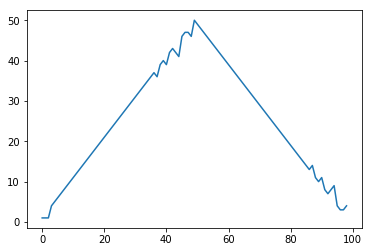

In [375]:
plt.plot([np.argmax(i)+1 for i in g.policy])

## Test Cases 

In [377]:
p = 0.4
gamma = 1
target = 4
g1 = Gambler(p, gamma, target)
g1.v = np.array([0, 0.3, 0.5, 0.7, 1])

#### Bellman update

In [378]:
s = 1 
bellman_1 = g1.policy[s-1][0] * ((1-p) * gamma * g1.v[0] + p*(gamma * g1.v[2]))
assert g1.bellman_update(1) ==  bellman_1
s = 2
bellman_2 = g1.policy[s-1][0] * ((1-p) * gamma * g1.v[1] + p*gamma * g1.v[3]) + \
    g1.policy[s-1][1] * ((1-p) * gamma * g1.v[0] + p*(1 + gamma * g1.v[4]))
assert sum(g1.bellman_update(2)) == bellman_2